# Value Iteration
The value function $V(s)$, is a measure of the expected reward you can receive from any given state $s$ given an **MDP** and *policy* $\pi(s|a)$ (a probability distribution over actions, $a \in A$ conditioned on a state $s$)
$$ V_{\pi}(s) = E[\sum \limits_{t=0} ^{\infty} \gamma^{t}| \pi, s_{0} = s]$$
The goal of Value iteration is to find a policy that maximizes the value function:
$$ \pi(s) = argmax_{a \in A(s)} V_{\pi}(s), s \in S $$
**Algorithm**
\
**Input**: $\theta$ > 0 tolerance param, $\gamma$ discount factor
\
**Result:** Find $V_{\pi}(s)$ and $\pi(s|a)$
\
$V(s) \leftarrow s \in S$
\
$\triangle \leftarrow \infty$
\
**while** $\triangle > \theta$ do
\
$\;\;\;\;\;\;$ $\triangle \leftarrow 0$
\
$\;\;\;\;\;\;$ **for** each $s \in S$ do
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ $v \leftarrow V(s)$
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ $V(s) \leftarrow max_{a} \sum \limits_{s', r}P(s, a, s')[R(s, a, s') + \gamma V(s')]$
\
$\;\;\;\;\;\; \;\;\;\;\;\;$ $\triangle \leftarrow max_{a}(\triangle, |temp - V(s)|)$
\
$\;\;\;\;\;\;$ **end for**
\
**end while**
\
\
$\pi(s|a) \leftarrow argmax_{a} \sum_{s'}P(s, a, s')[R(s, a, s') + \gamma V(s')]$
\
**Output:** Optimal state values $V_{\pi}(s) \; and \; \pi(s|a)$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent


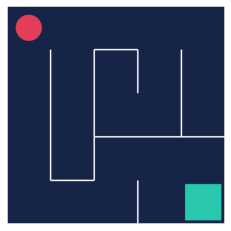

In [2]:
# env
env = Maze()
env.reset()

# plot the frame
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

env.close()

In [3]:
state_space = env.observation_space.nvec
num_actions = env.action_space.n

In [4]:
print(f'Observation space: {state_space}\nNumber of actions: {num_actions}')

Observation space: [5 5]
Number of actions: 4


## Define the policy 
#### Create the policy

In [12]:
policy_probabilities = np.full((5,5,4), .25)

In [13]:
def policy(state):
    return policy_probabilities[state]

In [14]:
action_prob = policy((0,0))

for action, prob in zip(range(4),action_prob):
    print(f'Probabilty of taking action {action}: {prob}')

Probabilty of taking action 0: 0.25
Probabilty of taking action 1: 0.25
Probabilty of taking action 2: 0.25
Probabilty of taking action 3: 0.25


In [ ]:
env.reset()
test_agent(env, policy, episodes=1)

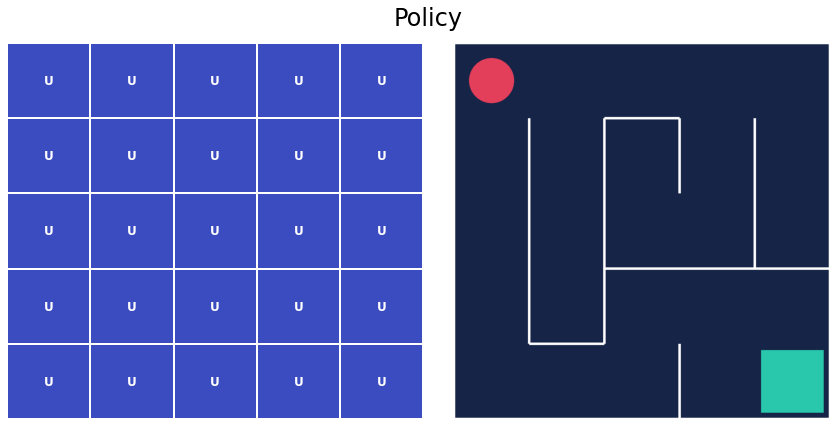

In [15]:
plot_policy(policy_probabilities, frame)

#### Define value table

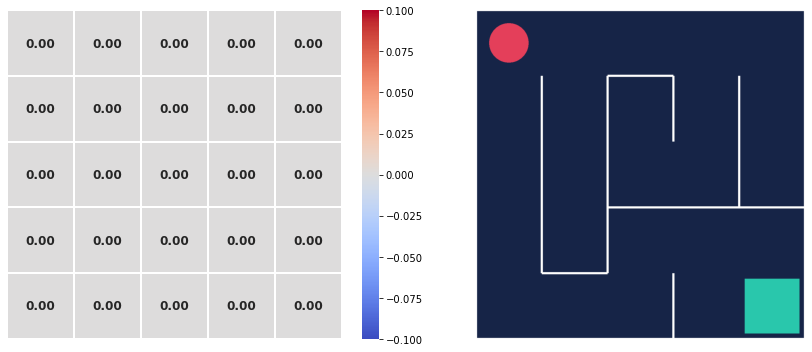

In [16]:
state_values = np.zeros((5,5))

# plot
plot_values(state_values=state_values, frame=frame)

In [22]:
# implement the value ilteration algorithm
def value_iteration(policy_probabilities, state_values, theta=1e-6, gamma=.99):
    delta = float('inf')
    
    while delta > theta:
        delta = 0
        for i in range(5):
            for j in range(5):
                # old value of next state v(s')
                old = state_values[(i, j)]
                action_probs = None
                # high return amount the avaliable action
                max_qsa = float('-inf')
                
                # iterate over each avalible actions
                for action in range(4):
                    # simulate
                    next, reward, _, _  = env.simulate_step((i,j), action)
                    # return discount of the next state reward
                    qsa = reward + gamma * state_values[next]
                    
                    # update the return if greater tha the optimal
                    if qsa > max_qsa:
                        max_qsa = qsa
                        # update action
                        action_probs = np.zeros(4)
                        action_probs[action] = 1.
                    
                    
                # update the value estimate to the highest return optain by the optimal action in the given state
                state_values[(i, j)] = max_qsa
                # update the table of prob that policy use to choose the optimal action
                policy_probabilities[(i,j)] = action_probs
                
                
                delta = max(delta, abs(max_qsa - old))

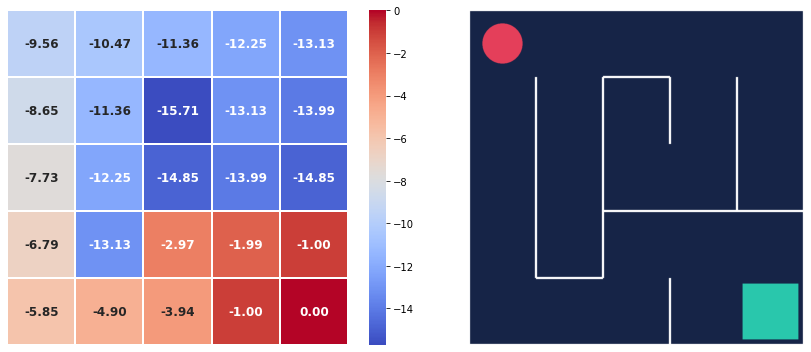

In [23]:
env.reset()

value_iteration(policy_probabilities, state_values)
plot_values(state_values=state_values, frame=frame)

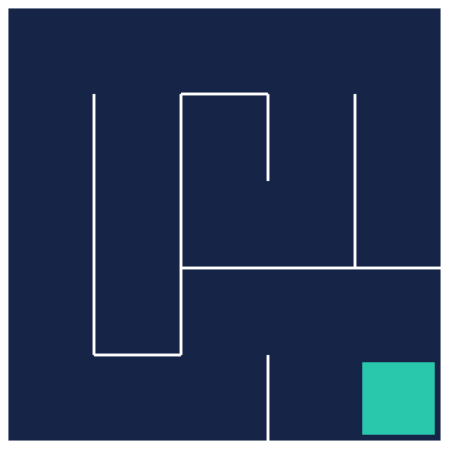

In [24]:
test_agent(env, policy,episodes=1)

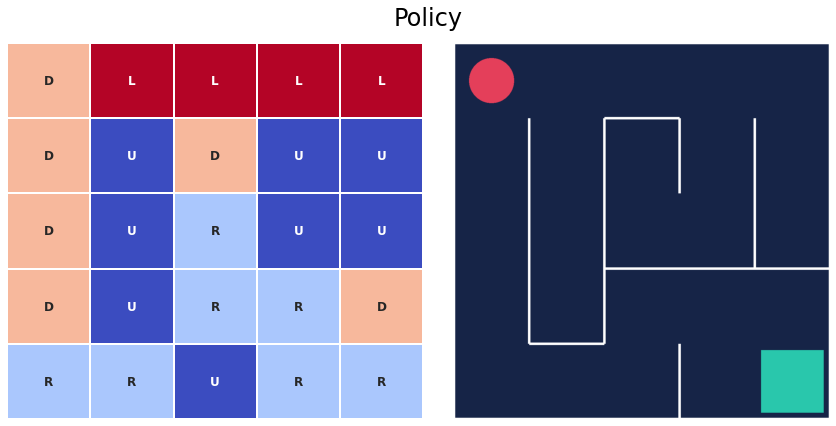

In [25]:
# optimal policy
plot_policy(policy_probabilities, frame)